### Name: Saloni Vishwakarma
### Roll No: C1-13

## Multiple Regression

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [36]:
dataset=pd.read_csv("Advertising_Sales.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:, -1].values

In [37]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [38]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [39]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
dataset.shape

(200, 4)

In [41]:
import seaborn as sns

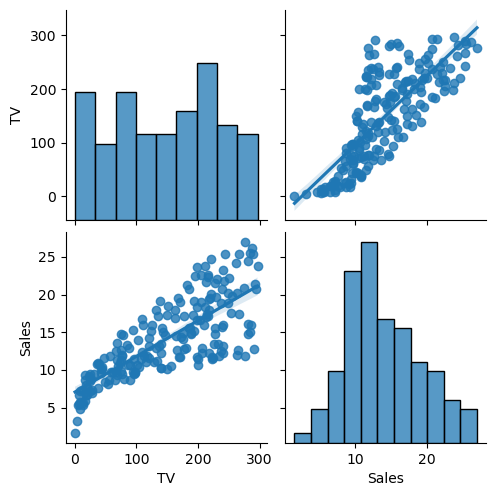

In [42]:
sns.pairplot(dataset,vars=['TV','Sales'],kind='reg')

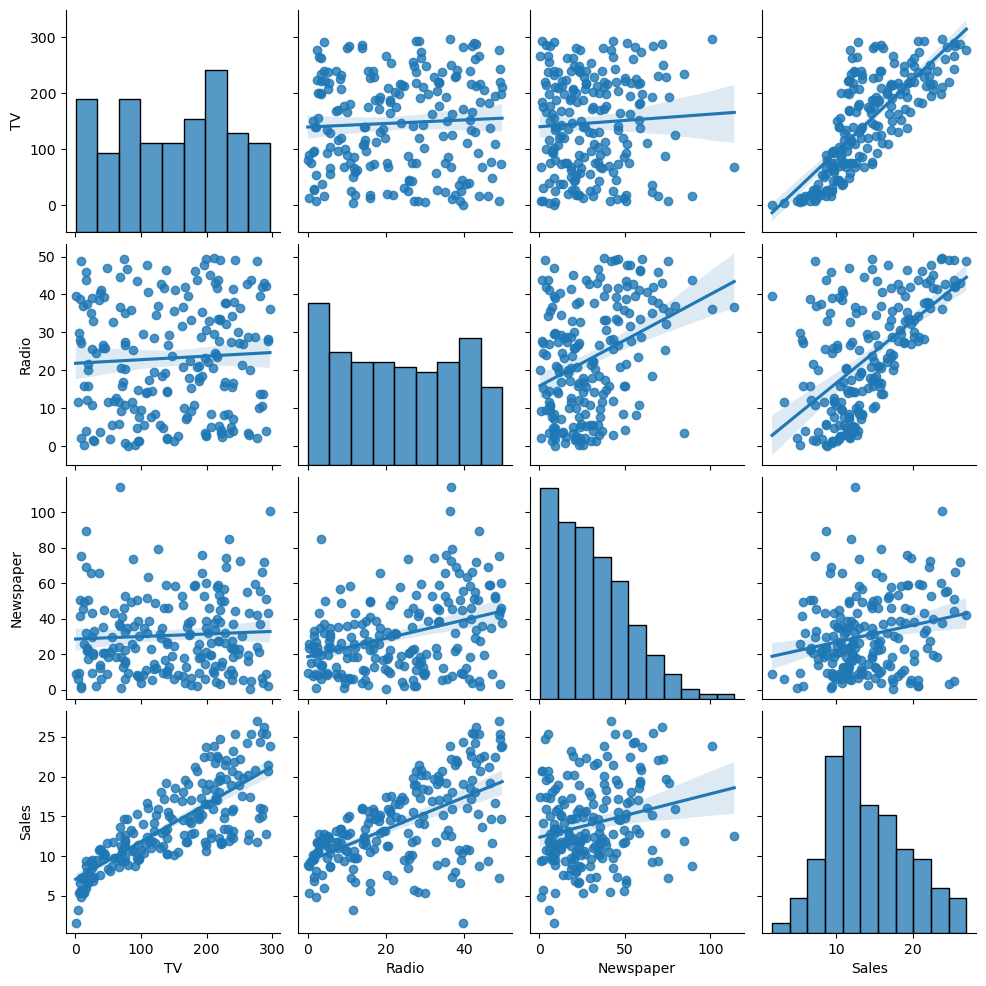

In [43]:
sns.pairplot(dataset,kind='reg')

In [44]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

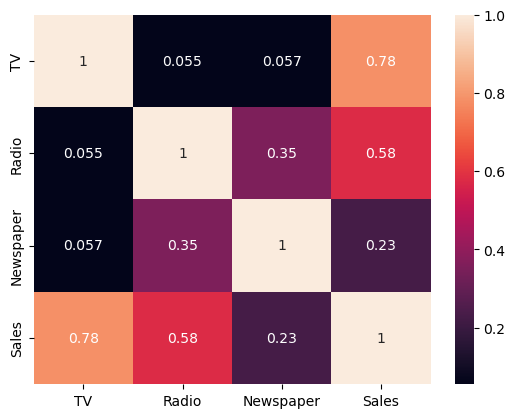

In [45]:
sns.heatmap(dataset.corr(),annot=True)

In [46]:
x=dataset[['TV','Radio','Newspaper']]

In [47]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [48]:
y=dataset.Sales

In [49]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Splitting the dataset into Training Set and Test Set

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [51]:
print(x_train)

        TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]


In [52]:
print("x_train")
print(x_train)
print("x_test")
print(x_test)

x_train
        TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]
x_test
        TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51  

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [54]:
print("x:",x)

x:         TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [55]:
print("x_train:",x_train)
print("x_test:",x_test)

x_train:         TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]
x_test:         TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51

In [56]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [57]:
print(x_train)

[[-1.47861420e+00 -1.50740896e+00 -2.07096465e-01]
 [-5.93912087e-01 -1.51399099e+00 -3.21290955e-01]
 [-1.41452194e+00 -7.37311102e-01 -3.11774748e-01]
 [ 7.07389725e-01  6.31751749e-01  7.63556698e-01]
 [-1.54499547e+00  3.15814168e-01  5.44683926e-01]
 [ 5.73110715e-02  3.93687845e-02 -5.16373209e-01]
 [-7.33541657e-01  1.54665433e+00  2.16374768e-01]
 [ 9.80926342e-01  9.47689330e-01  9.74221741e-02]
 [ 7.17690268e-01  1.43475977e+00 -4.92582690e-01]
 [ 9.98093912e-01  5.92259551e-01  2.10534195e+00]
 [ 1.68708573e+00  1.25046284e+00  1.01097809e+00]
 [-2.19659059e-01  7.43646309e-01 -8.35166159e-01]
 [-1.40651040e+00 -4.80611817e-01 -3.64113889e-01]
 [ 4.61321221e-01  1.50716213e+00  1.36783587e+00]
 [ 1.41126010e+00 -2.17330500e-01 -1.41089671e+00]
 [ 2.66755427e-01 -8.75533794e-01 -5.87744765e-01]
 [ 8.72198398e-01 -1.17830731e+00 -1.21450598e-01]
 [-1.34241814e+00 -8.09713464e-01 -1.20142119e-02]
 [ 1.02785103e+00 -9.67682255e-01 -1.01121600e+00]
 [-1.13640730e+00  1.71009443e-

In [58]:
print(x_test)

[[ 7.84071539e-01  1.73095125e+00  3.68634087e-01]
 [ 6.89077651e-01 -6.59437425e-02  7.83897591e-02]
 [-5.33253340e-01 -1.44158863e+00 -1.07307135e+00]
 [ 1.57835778e+00 -8.68951761e-01 -4.06936823e-01]
 [ 1.27620855e+00 -1.31764072e-01  2.26009928e-03]
 [ 1.61727094e+00  1.23071675e+00  1.72469365e+00]
 [ 2.40431819e-01  5.46185321e-01  1.09186586e+00]
 [ 4.40720137e-01 -8.22877530e-01  1.35356156e+00]
 [-8.20524012e-01 -4.80611817e-01  5.16135303e-01]
 [ 8.36718753e-01  1.96226857e-02  1.31549673e+00]
 [ 2.54165875e-01 -1.58092204e-01  8.30170150e-01]
 [-8.36547078e-01 -1.84420335e-01 -5.54438039e-01]
 [ 8.28707221e-01  4.59508174e-02 -1.23484687e+00]
 [-3.71878181e-01  1.61247466e+00  1.02049430e+00]
 [ 9.55747239e-01 -9.94010386e-01  1.26315759e+00]
 [-1.89901938e-01  8.95033066e-01  2.34324714e+00]
 [-1.21231657e-01 -3.22643027e-01  2.21132871e-01]
 [ 1.69853077e+00 -1.26387374e+00 -1.02073221e+00]
 [-1.33555111e+00  1.03325576e+00 -9.82667375e-01]
 [ 7.82927034e-01  4.07962629e-

In [59]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train) 

LinearRegression()

In [60]:
linreg.intercept_

13.811250000000001

In [61]:
linreg.coef_

array([4.09287129, 2.7126018 , 0.05435329])

In [62]:
y_pred=linreg.predict(x_test)

In [63]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [64]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

     Actual  Predicted
58     23.8  21.735772
40     16.6  16.456938
34      9.5   7.659932
102    14.8  17.892027
184    17.6  18.677307
198    25.5  23.862719
95     16.9  16.336236
4      12.9  13.456492
29     10.5   9.177296
168    17.1  17.360562
171    14.5  14.467799
18     11.3   9.856976
11     17.4  17.260570
89     16.7  16.718669
110    13.4  15.095303
118    15.9  15.589237
159    12.9  12.451882
35     12.8  17.279252
136     9.5  11.094411
59     18.4  18.068899
51     10.7   9.334331
16     12.5  12.913458
44      8.5   8.784280
94     11.5  10.466707
31     11.9  11.403032
162    14.9  15.031047
38     10.1   9.784794
28     18.9  19.460286
193    19.6  18.229549
27     15.9  17.195890
47     23.2  21.603042
165    11.9  14.719014
194    17.3  16.292055
177    11.7  12.364323
176    20.2  19.988313
97     15.5  15.375564
174    11.5  13.966783
73     11.0  10.068095
69     22.3  20.971973
172     7.6   7.458778


In [65]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  1.0402154012924714


In [66]:
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error:  1.9918855518287883


In [67]:
print('Root Mean Square Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Square Error:  1.411341755858158


In [68]:
metrics.r2_score(y_test,y_pred)

0.8927605914615385